<a href="https://colab.research.google.com/github/Katie0731/stats_DL/blob/main/chapter05_fundamentals-of-ml%20(%EC%8B%A4%EC%8A%B5-0420).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
# np.random.random((len(train_images), 784)) -> random noisy data 같은 개수만큼 추가
train_images_with_noise_channels.shape # 784 * 2 = 1568

(60000, 1568)

In [3]:
train_images_with_zeros_channels.shape

(60000, 1568)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the Model
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 4ms/step - loss: 0.6336 - accuracy: 0.8087 - val_loss: 0.2987 - val_accuracy: 0.9031
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2533 - accuracy: 0.9216 - val_loss: 0.2555 - val_accuracy: 0.9236
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1660 - accuracy: 0.9489 - val_loss: 0.1665 - val_accuracy: 0.9492
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1168 - accuracy: 0.9642 - val_loss: 0.1460 - val_accuracy: 0.9553
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0858 - accuracy: 0.9731 - val_loss: 0.1284 - val_accuracy: 0.9633
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0639 - accuracy: 0.9792 - val_loss: 0.1607 - val_accuracy: 0.9515
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0469 - accuracy: 0.9847 - val_loss: 0.1272 - val_accuracy: 0.9666
Epoch 

#### 375값 어떻게 나오는지!
- [ 60000 / 128 (batch size) ] * [ 1 - 0.2(validation_split) ]

In [5]:
model = get_model()
history1 = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.2855 - accuracy: 0.9176 - val_loss: 0.1549 - val_accuracy: 0.9524
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1200 - accuracy: 0.9643 - val_loss: 0.1079 - val_accuracy: 0.9669
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0773 - accuracy: 0.9775 - val_loss: 0.0862 - val_accuracy: 0.9747
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0556 - accuracy: 0.9841 - val_loss: 0.0788 - val_accuracy: 0.9762
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0411 - accuracy: 0.9880 - val_loss: 0.0836 - val_accuracy: 0.9754
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0310 - accuracy: 0.9908 - val_loss: 0.0871 - val_accuracy: 0.9772
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0245 - accuracy: 0.9929 - val_loss: 0.0874 - val_accuracy: 0.9762
Epoch 

**Plotting a validation accuracy comparison**

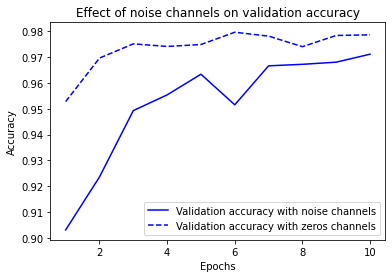

In [6]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

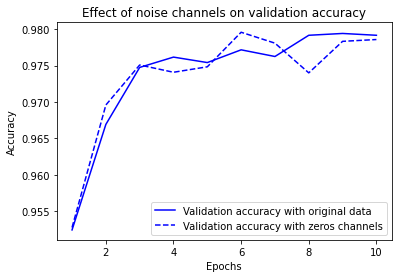

In [7]:
import matplotlib.pyplot as plt
val_acc = history1.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc, "b-",
         label="Validation accuracy with original data")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# looks kind similar with original data

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [8]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3173 - accuracy: 0.1057 - val_loss: 2.3070 - val_accuracy: 0.0997
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.3000 - accuracy: 0.1195 - val_loss: 2.3123 - val_accuracy: 0.1080
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2920 - accuracy: 0.1285 - val_loss: 2.3203 - val_accuracy: 0.1039
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2776 - accuracy: 0.1399 - val_loss: 2.3275 - val_accuracy: 0.1007
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2603 - accuracy: 0.1531 - val_loss: 2.3354 - val_accuracy: 0.1028
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2388 - accuracy: 0.1684 - val_loss: 2.3562 - val_accuracy: 0.1070
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2140 - accuracy: 0.1811 - val_loss: 2.3678 - val_accuracy: 0.1037

In [9]:
print(train_labels)
print(random_train_labels)
np.random.shuffle(random_train_labels)
print(random_train_labels) # np random shuffle이 바로 저장이 되는구나!

[4 4 0 ... 3 8 3]
[4 4 0 ... 3 8 3]
[9 4 2 ... 5 6 0]


#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

## loss improve가 아예 진행 안되는 첫번째 경우

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 846.0012 - accuracy: 0.3510 - val_loss: 2.1535 - val_accuracy: 0.2701
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 4.2530 - accuracy: 0.2503 - val_loss: 2.3671 - val_accuracy: 0.2277
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 3.5897 - accuracy: 0.2440 - val_loss: 2.4778 - val_accuracy: 0.2029
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8445 - accuracy: 0.2792 - val_loss: 2.7942 - val_accuracy: 0.3330
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 3.6238 - accuracy: 0.2875 - val_loss: 2.7463 - val_accuracy: 0.2730
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8382 - accuracy: 0.2750 - val_loss: 2.7005 - val_accuracy: 0.3445
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.9276 - accuracy: 0.2907 - val_loss: 2.4368 - val_accuracy: 0.3037
Epoc

**The same model with a more appropriate learning rate**

In [11]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

## 결과 앞보단 나음. 잘됨. 그래도 저 RMSprop이 너무너무 작으면 converge slowly라 안좋음

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.3498 - accuracy: 0.9129 - val_loss: 0.1973 - val_accuracy: 0.9449
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1400 - accuracy: 0.9641 - val_loss: 0.1659 - val_accuracy: 0.9653
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1166 - accuracy: 0.9718 - val_loss: 0.1660 - val_accuracy: 0.9677
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1021 - accuracy: 0.9776 - val_loss: 0.1879 - val_accuracy: 0.9708
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0871 - accuracy: 0.9819 - val_loss: 0.2294 - val_accuracy: 0.9685
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0862 - accuracy: 0.9836 - val_loss: 0.2119 - val_accuracy: 0.9718
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0663 - accuracy: 0.9868 - val_loss: 0.2361 - val_accuracy: 0.9743
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [12]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6625 - accuracy: 0.8408 - val_loss: 0.3562 - val_accuracy: 0.9053
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3502 - accuracy: 0.9033 - val_loss: 0.3057 - val_accuracy: 0.9165
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3152 - accuracy: 0.9126 - val_loss: 0.2911 - val_accuracy: 0.9183
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2989 - accuracy: 0.9164 - val_loss: 0.2803 - val_accuracy: 0.9230
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2896 - accuracy: 0.9191 - val_loss: 0.2744 - val_accuracy: 0.9243
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2832 - accuracy: 0.9217 - val_loss: 0.2715 - val_accuracy: 0.9248
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2782 - accuracy: 0.9221 - val_loss: 0.2686 - val_accuracy: 0.9257
Epoch 

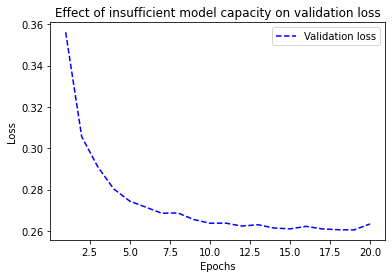

In [13]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#우하향하는 그래프 나올거다. epoch 늘리는 게 좋은 건 아닌데.. loss도 작은 편은 아님

In [14]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3544 - accuracy: 0.9005 - val_loss: 0.1892 - val_accuracy: 0.9457
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1573 - accuracy: 0.9530 - val_loss: 0.1527 - val_accuracy: 0.9561
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1123 - accuracy: 0.9666 - val_loss: 0.1236 - val_accuracy: 0.9636
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0857 - accuracy: 0.9735 - val_loss: 0.1094 - val_accuracy: 0.9675
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0691 - accuracy: 0.9787 - val_loss: 0.1016 - val_accuracy: 0.9690
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0575 - accuracy: 0.9825 - val_loss: 0.1006 - val_accuracy: 0.9714
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0464 - accuracy: 0.9859 - val_loss: 0.0976 - val_accuracy: 0.9726
Epoch 

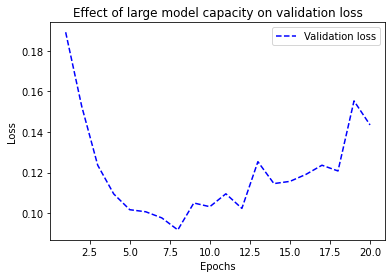

In [15]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of large model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## overfit 문제는 있지만 loss도 줄고 좋아!

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [16]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5047 - accuracy: 0.7931 - val_loss: 0.3773 - val_accuracy: 0.8764
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3047 - accuracy: 0.9005 - val_loss: 0.3047 - val_accuracy: 0.8879
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2261 - accuracy: 0.9255 - val_loss: 0.2774 - val_accuracy: 0.8943
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1776 - accuracy: 0.9427 - val_loss: 0.2750 - val_accuracy: 0.8913
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1455 - accuracy: 0.9543 - val_loss: 0.2783 - val_accuracy: 0.8902
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1186 - accuracy: 0.9641 - val_loss: 0.3247 - val_accuracy: 0.8748
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0989 - accurac

**Version of the model with lower capacity**

In [17]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5876 - accuracy: 0.7679 - val_loss: 0.4973 - val_accuracy: 0.8520
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4314 - accuracy: 0.8870 - val_loss: 0.4114 - val_accuracy: 0.8705
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3437 - accuracy: 0.9083 - val_loss: 0.3506 - val_accuracy: 0.8807
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2841 - accuracy: 0.9211 - val_loss: 0.3233 - val_accuracy: 0.8795
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2428 - accuracy: 0.9291 - val_loss: 0.3002 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2116 - accuracy: 0.9389 - val_loss: 0.2852 - val_accuracy: 0.8903
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1868 - accuracy: 0.9448 - val_loss: 0.2768 - val_accuracy: 0.8926
Epoch 8/20
30

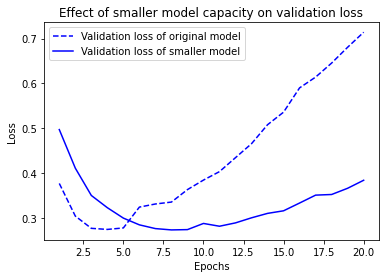

In [18]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of smaller model")
plt.title("Effect of smaller model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# smaller 모델.. overfit 없지만 loss original보다 큰걸 (지금 해본 결과는 엇비슷? 하게 나왔는데 original vs small 별 차이 없잖아)

**Version of the model with higher capacity**

In [19]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5474 - accuracy: 0.7553 - val_loss: 0.3111 - val_accuracy: 0.8881
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2551 - accuracy: 0.9031 - val_loss: 0.2825 - val_accuracy: 0.8878
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1688 - accuracy: 0.9329 - val_loss: 0.2643 - val_accuracy: 0.8925
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0655 - accuracy: 0.9794 - val_loss: 0.3689 - val_accuracy: 0.8830
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1118 - accuracy: 0.9729 - val_loss: 0.3594 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0047 - accuracy: 0.9994 - val_loss: 0.5190 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 6.9208e-04 - accuracy: 0.9999 - val_loss: 0.6170 - val_accuracy: 0.8867
Epoch 8/2

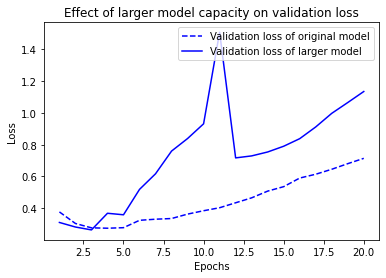

In [20]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of larger model")
plt.title("Effect of larger model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [21]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5800 - accuracy: 0.7833 - val_loss: 0.4451 - val_accuracy: 0.8755
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3826 - accuracy: 0.8993 - val_loss: 0.3934 - val_accuracy: 0.8800
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3200 - accuracy: 0.9159 - val_loss: 0.3593 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2914 - accuracy: 0.9268 - val_loss: 0.3914 - val_accuracy: 0.8725
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2713 - accuracy: 0.9337 - val_loss: 0.3723 - val_accuracy: 0.8826
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2574 - accuracy: 0.9397 - val_loss: 0.3784 - val_accuracy: 0.8785
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2499 - accuracy: 0.9437 - val_loss: 0.3674 - val_accuracy: 0.8849
Epoch 8/20
30

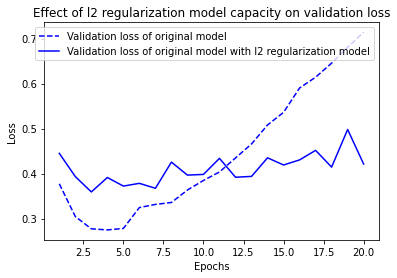

In [22]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of original model with l2 regularization model")
plt.title("Effect of l2 regularization model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# smaller 모델.. overfit 없지만 loss original보다 큰걸

**Different weight regularizers available in Keras**

In [23]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [24]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.6272 - accuracy: 0.6350 - val_loss: 0.5207 - val_accuracy: 0.8435
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5146 - accuracy: 0.7619 - val_loss: 0.4177 - val_accuracy: 0.8584
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4369 - accuracy: 0.8164 - val_loss: 0.3545 - val_accuracy: 0.8832
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3805 - accuracy: 0.8544 - val_loss: 0.3116 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3258 - accuracy: 0.8857 - val_loss: 0.2985 - val_accuracy: 0.8813
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2946 - accuracy: 0.9016 - val_loss: 0.2819 - val_accuracy: 0.8890
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2565 - accuracy: 0.9161 - val_loss: 0.2834 - val_accuracy: 0.8832
Epoch 8/20
30

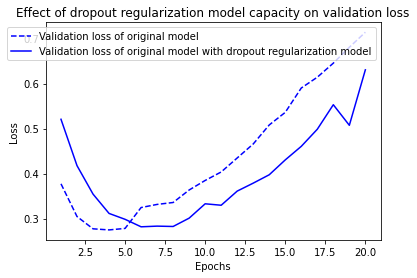

In [25]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of original model with dropout regularization model")
plt.title("Effect of dropout regularization model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Summary